# TASK-2: GRIP APR21 THE SPARK FOUNDATION

# Author: Pandhigunta Surya Kumar
Data Science & Business Analytics intern at The Sparks Foundation


# Prediction using Unsupervised ML

In [1]:
#import required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\surya\\Desktop\\Simplilearn\\TSF'

In [3]:
# loading data

data=pd.read_csv(r"C:\\Users\\surya\\Desktop\\Simplilearn\\TSF\\Task_2_data_Iris.csv")

In [4]:
# Read first 5 observations
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#To check null vlues

data.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing values

In [6]:
data.shape

(150, 6)

In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [11]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# droping Id column

data.drop('Id', axis = 1, inplace = True) 
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Descriptive Stat and Correlation Matrix

In [13]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


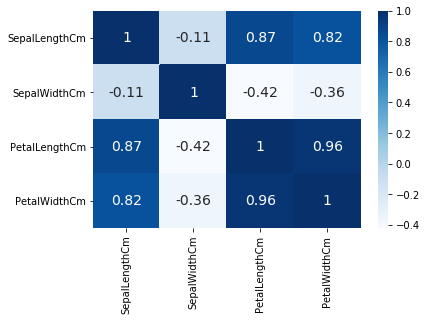

In [15]:
# Heat map for correlation matrix

corr = data.corr()
sns.heatmap(corr, cmap = "Blues", vmax = 1, annot_kws = {'size':14}, annot = True)
#vmax: value to anchor the colourmap
#annot_kws: specifies the size of values displayed in each cell
#annot = True: write the data value in each cell
plt.show()

# Visualization

In [16]:
# Count the values present in column species
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

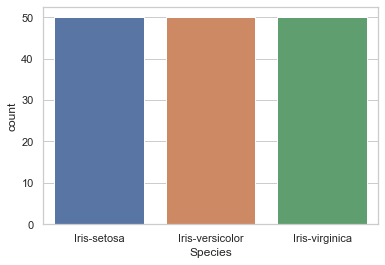

In [17]:
sns.set(style='whitegrid')
sns.countplot(data.Species)

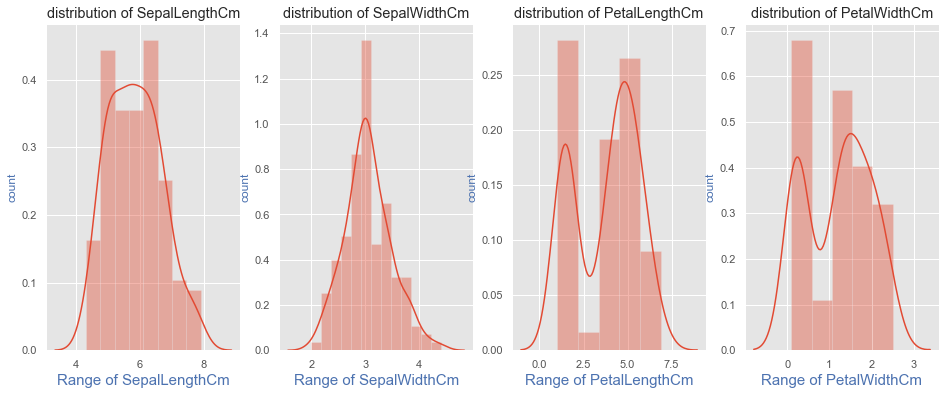

In [18]:
plt.figure(figsize=(16,6))
plt.style.use('ggplot')
plt.subplot(1,4,1)
sns.distplot(data['SepalLengthCm'])
plt.title('distribution of SepalLengthCm')
plt.xlabel('Range of SepalLengthCm',fontsize=15,c='b')
plt.ylabel('count',c='b')

plt.style.use('ggplot')
plt.subplot(1,4,2)
sns.distplot(data['SepalWidthCm'])
plt.title('distribution of SepalWidthCm')
plt.xlabel('Range of SepalWidthCm',fontsize=15,c='b')
plt.ylabel('count',c='b')

plt.style.use('ggplot')
plt.subplot(1,4,3)
sns.distplot(data['PetalLengthCm'])
plt.title('distribution of PetalLengthCm')
plt.xlabel('Range of PetalLengthCm',fontsize=15,c='b')
plt.ylabel('count',c='b')

plt.style.use('ggplot')
plt.subplot(1,4,4)
sns.distplot(data['PetalWidthCm'])
plt.title('distribution of PetalWidthCm')
plt.xlabel('Range of PetalWidthCm',fontsize=15,c='b')
plt.ylabel('count',c='b')

plt.show()

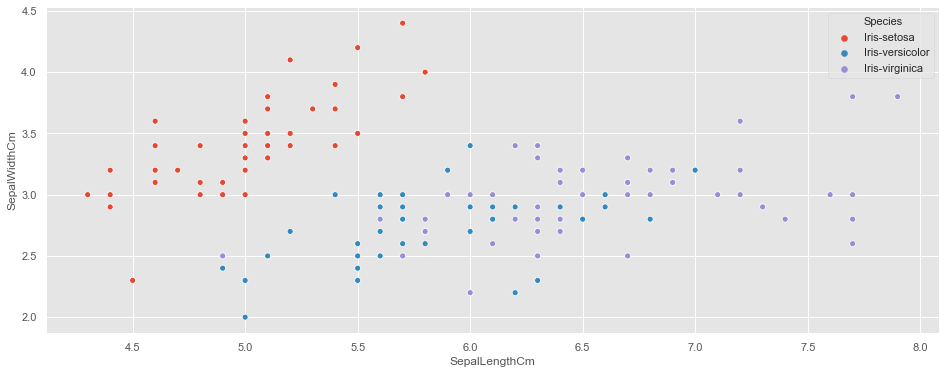

In [19]:
plt.figure(figsize=(16,6))
sns.scatterplot(data['SepalLengthCm'],data['SepalWidthCm'],hue=data['Species'])

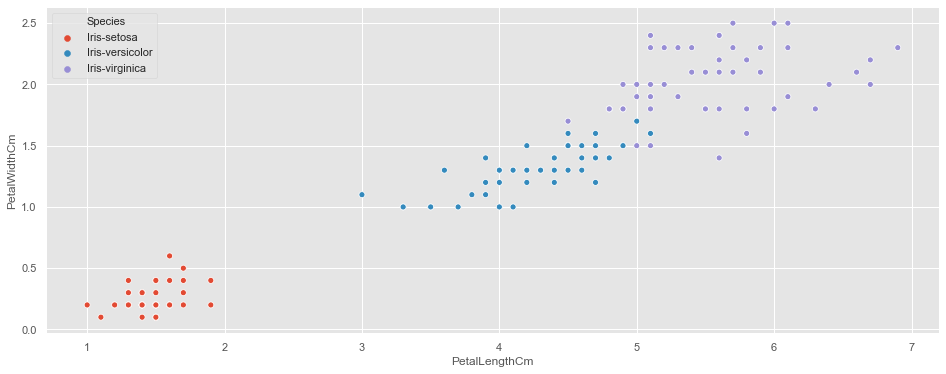

In [20]:
plt.figure(figsize=(16,6))
sns.scatterplot(data['PetalLengthCm'],data['PetalWidthCm'],hue=data['Species'])

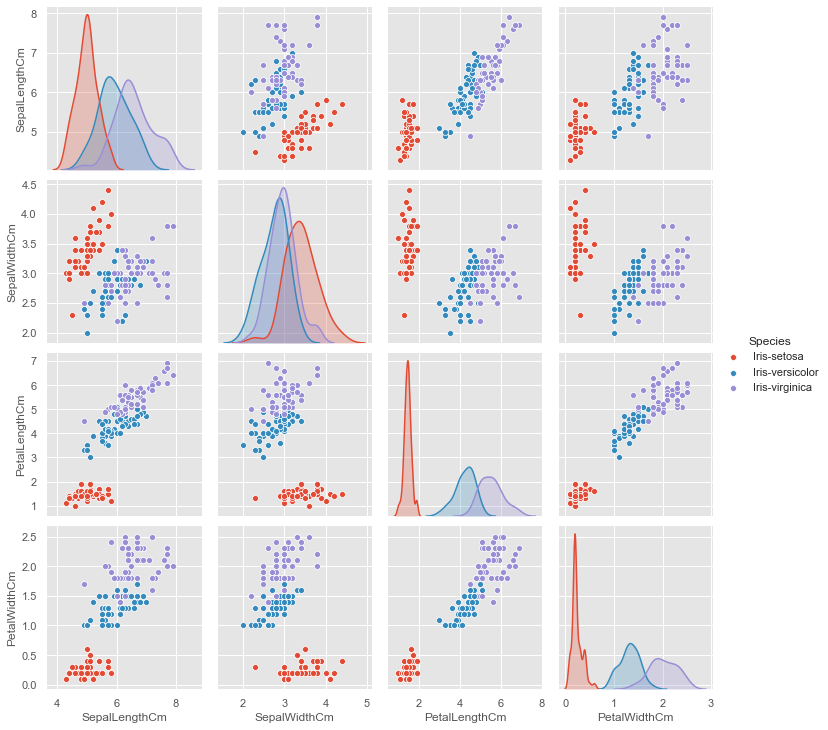

In [21]:
sns.pairplot(data,hue="Species")

# Check the Outliers

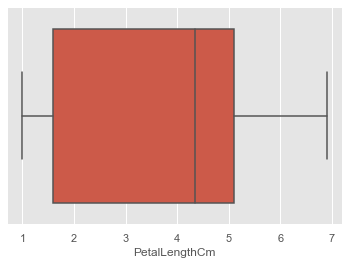

In [22]:
sns.boxplot(x=data['PetalLengthCm'])

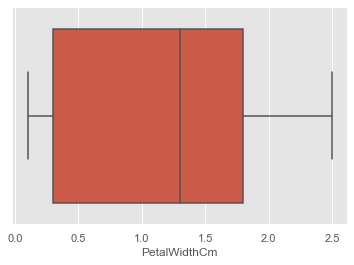

In [23]:
sns.boxplot(x=data['PetalWidthCm'])

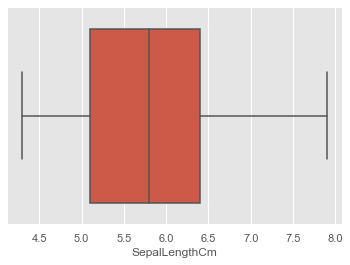

In [24]:
sns.boxplot(x=data['SepalLengthCm'])

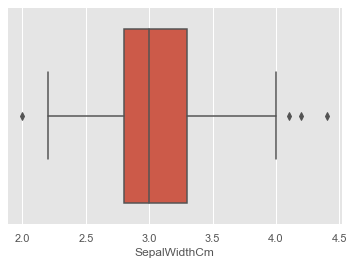

In [25]:
sns.boxplot(x=data['SepalWidthCm'])

In [26]:
# reduce outlier problem

for i in ['SepalWidthCm']:
    q3,q1 = np.percentile(data.loc[ : , i],[75,25])
    iqr = q3-q1
    max = q3+(1.5*iqr)
    min = q1-(1.5*iqr)

#replacing the outlier values with NaN

data.loc[data[i] < min, i] = np.nan
data.loc[data[i] > max, i] = np.nan

In [27]:
#replacing the NaN values with the mean/average values in the column

data['SepalWidthCm'].fillna(data['SepalWidthCm'].mean(), inplace=True)

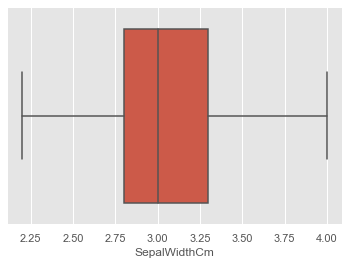

In [28]:
# Now again fit box plot for identify outliers in SepalWidthCm

sns.boxplot(x = data['SepalWidthCm'])

# To find optimum no of clusters

In [29]:
from sklearn.cluster import KMeans

In [30]:
x = data.iloc[: , [0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[675.4520739726026,
 149.20866916609327,
 76.58362147324073,
 55.17327276660054,
 44.41702971104498,
 38.3962006281546,
 33.61912659216023,
 29.708601752873257,
 27.991379530651038,
 26.625191864259463]

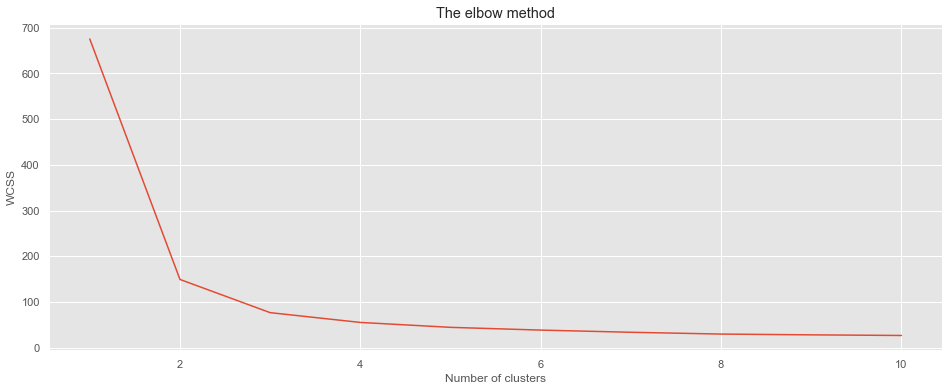

In [31]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(16,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [32]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Plotting clusters 

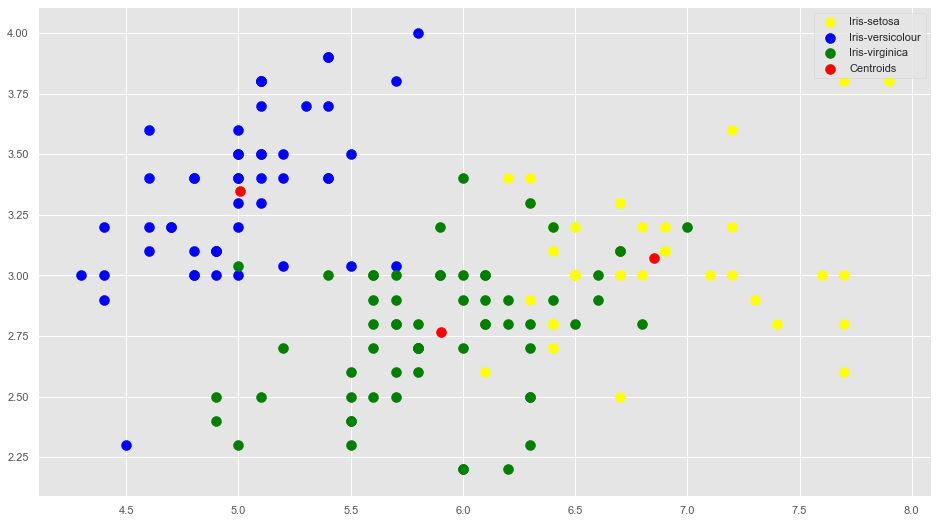

In [33]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (16,9))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa') ## cluster for Iris-setosa 
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour') ## cluster for Iris-versicolour
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica') ## Iris - viriginica

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()

#                              **********Thank you***********